In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Equation

$\hat{\theta} = (X^T*X)^{-1}*X^T*y$ 

Generating some toy data.

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # best theta found, notice that the eq is y=4+3x

array([[ 4.4829186],
       [ 2.9966869]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.4829186 ],
       [ 10.47629239]])

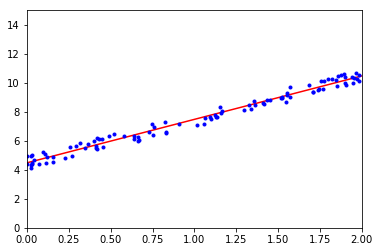

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

Equivalent in Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.4829186]), array([[ 2.9966869]]))

In [8]:
lin_reg.predict(X_new)

array([[  4.4829186 ],
       [ 10.47629239]])

# Gradient Descent

## Batch Gradient Descent 

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m =100

theta = np.random.rand(2,1) # random initialization

In [10]:
for iterations in range(n_iterations):
    gradients = 2.0/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[ 4.4829186],
       [ 2.9966869]])

## Stochastic Gradient Descent 

In [11]:
n_epochs = 50
t0, t1 = 5.0, 50 # learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.rand(2,1) # random initialization

In [12]:
a = 0
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1,:]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
print theta

[[ 4.4547616 ]
 [ 3.00841745]]


Equivalent in Scikit-learn

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_regressor.fit(X, y.ravel())
sgd_regressor.intercept_, sgd_regressor.coef_

(array([ 4.47661807]), array([ 2.98954268]))

## Mini-batch Gradient Descent 

Computer the gradients on small random sets of instances called mini-batch.

# Polynomial Regression

In [14]:
m = 100
X = 6 * np.random.rand(m ,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

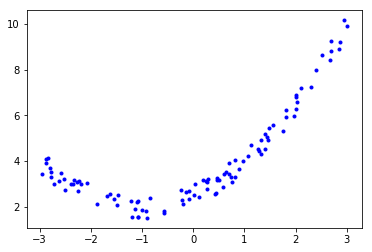

In [15]:
plt.plot(X, y, "b.")
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([ 0.46920493])

In [17]:
X_poly[0]

array([ 0.46920493,  0.22015327])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.53024183]), array([[ 0.99888086,  0.49926282]]))

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range (1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()

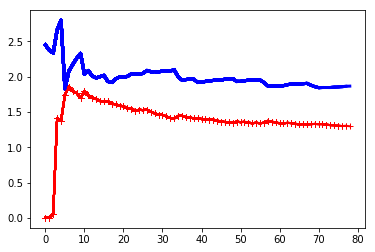

In [20]:
lin_reg = LinearRegression()
# model underfiting, performs poorly on training and validation data
plot_learning_curves(lin_reg, X, y) 

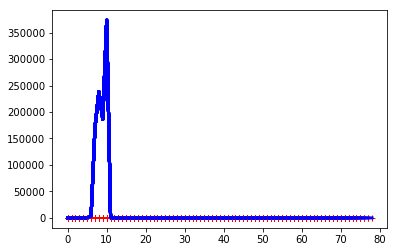

In [21]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

Model's generalization error can be bias, variance, or irreducible errors. 

**Bias:** It's due to wrong assumptions, e.g. assuming the data is linear when it's quadrantic.

**Variance:** It's when the model's execessive sensitivity to small variations in the training data. 

**Irreducible error:** noisiness of the data itself. 

# Regularized Linear Models

Regularization of linear models can be achieve by constraining the weights of the model.

## Ridge Regression

__Cost function__

$J(\theta)= MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$

Where $\alpha$ controls how much you want to regularize the model. If $\alpha=0$ then ridge regression is just a linear regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

__Closed-form solution__

$\hat\theta = (X^T*X+\alpha A)^-1*X^T*y$

Using a matrix factorization technique by André-lous Cholesky

In [23]:
# closed-form with scikit-learn
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.32006492]])

Using Stochastic Gradient Descent

In [27]:
# penalty sets the type of regularization term to use.
# "l2" indicates that you want SGD to add a regularization term 
# to the cost function equal to hasl the square of l2 norm of the
# weight vector: this is simply Ridge Regression.
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.31709049])

## Lasso Regression

## Elastic Net